In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('temperature_data.csv')

In [3]:
data

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-1.222428,-0.255640,1.029142,-0.245723,0.429853,1.018568,0.836084,0.494725,72
998066,-0.048839,0.320022,0.331701,-1.250655,-1.222437,-0.255640,1.029148,-0.245736,0.429751,1.013416,0.834438,0.494279,72
998067,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.255640,1.029191,-0.245701,0.429439,1.002906,0.833936,0.492666,72
998068,-0.039433,0.302082,0.330987,-1.249505,-1.222432,-0.255640,1.029147,-0.245727,0.429558,0.999157,0.830504,0.490581,72


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


# preprocessing

In [5]:
def preprocess_inputs(df):
    df=df.copy()
    
    df=df.drop('profile_id', axis=1)
    
    y=df['pm'].copy()
    X=df.drop('pm', axis=1).copy()
    
    scaler=StandardScaler()
    X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    
    return X, y

In [6]:
X, y= preprocess_inputs(data)

In [7]:
X

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,stator_yoke,stator_tooth,stator_winding
0,-0.753416,-1.120454,0.323842,-1.289164,-1.214600,-0.247367,1.024560,-0.243174,-1.830112,-2.064767,-2.017442
1,-0.772669,-1.119032,0.325575,-1.288994,-1.214601,-0.246316,1.024497,-0.243146,-1.829659,-2.063483,-2.017040
2,-0.784378,-1.118693,0.328689,-1.293119,-1.214600,-0.246615,1.024435,-0.243132,-1.829091,-2.062697,-2.016752
3,-0.782408,-1.118776,0.329619,-1.293150,-1.214602,-0.245818,1.027836,-0.244271,-1.829024,-2.061760,-2.017041
4,-0.775467,-1.118787,0.331128,-1.294413,-1.214601,-0.245883,1.026797,-0.243925,-1.829189,-2.061418,-2.017555
...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.043894,0.336101,0.327389,-1.237541,-1.214600,-0.252836,1.024130,-0.243036,1.016892,0.838630,0.499487
998066,-0.045245,0.314537,0.327616,-1.242071,-1.214609,-0.252836,1.024135,-0.243049,1.011746,0.836983,0.499041
998067,-0.038711,0.301961,0.326859,-1.238277,-1.214602,-0.252836,1.024178,-0.243015,1.001246,0.836481,0.497425
998068,-0.035774,0.296640,0.326900,-1.240924,-1.214604,-0.252836,1.024134,-0.243041,0.997502,0.833048,0.495337


In [8]:
y

0        -2.522071
1        -2.522418
2        -2.522673
3        -2.521639
4        -2.521900
            ...   
998065    0.429853
998066    0.429751
998067    0.429439
998068    0.429558
998069    0.429166
Name: pm, Length: 998070, dtype: float64

***EDA***

In [9]:
eda_df= pd.concat([X, y],axis=1).copy()

In [10]:
eda_df.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,stator_yoke,stator_tooth,stator_winding,pm
count,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,998070.000000
mean,-8.710848e-14,3.311537e-14,-5.435962e-15,2.790820e-16,3.734451e-15,-5.697083e-13,2.613170e-15,9.983176e-16,-1.524101e-14,1.158428e-15,-6.861447e-15,-0.004396
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.995686
min,-8.629364e+00,-1.430606e+00,-1.663685e+00,-1.851460e+00,-1.363518e+00,-3.349634e+00,-3.255192e+00,-3.345431e+00,-1.833374e+00,-2.064767e+00,-2.019386e+00,-2.631991
25%,-5.996013e-01,-1.040127e+00,-8.329068e-01,-9.195578e-01,-9.443957e-01,-2.641375e-01,-7.631070e-01,-2.546066e-01,-7.470911e-01,-7.600494e-01,-7.228854e-01,-0.672308
50%,2.719319e-01,-1.814697e-01,2.633206e-01,-9.390939e-02,-1.337459e-01,-1.842995e-01,2.081015e-01,-1.872727e-01,-5.777424e-02,7.295650e-03,1.048858e-02,0.094367
75%,6.953605e-01,6.444250e-01,3.544629e-01,8.563201e-01,8.588639e-01,5.516585e-01,1.008947e+00,5.035055e-01,6.960052e-01,7.747592e-01,7.308067e-01,0.680691
max,2.991585e+00,2.637919e+00,2.274782e+00,1.795006e+00,2.028007e+00,3.026641e+00,1.055957e+00,2.923484e+00,2.445984e+00,2.329815e+00,2.662129e+00,2.917456


<Figure size 1152x1152 with 0 Axes>

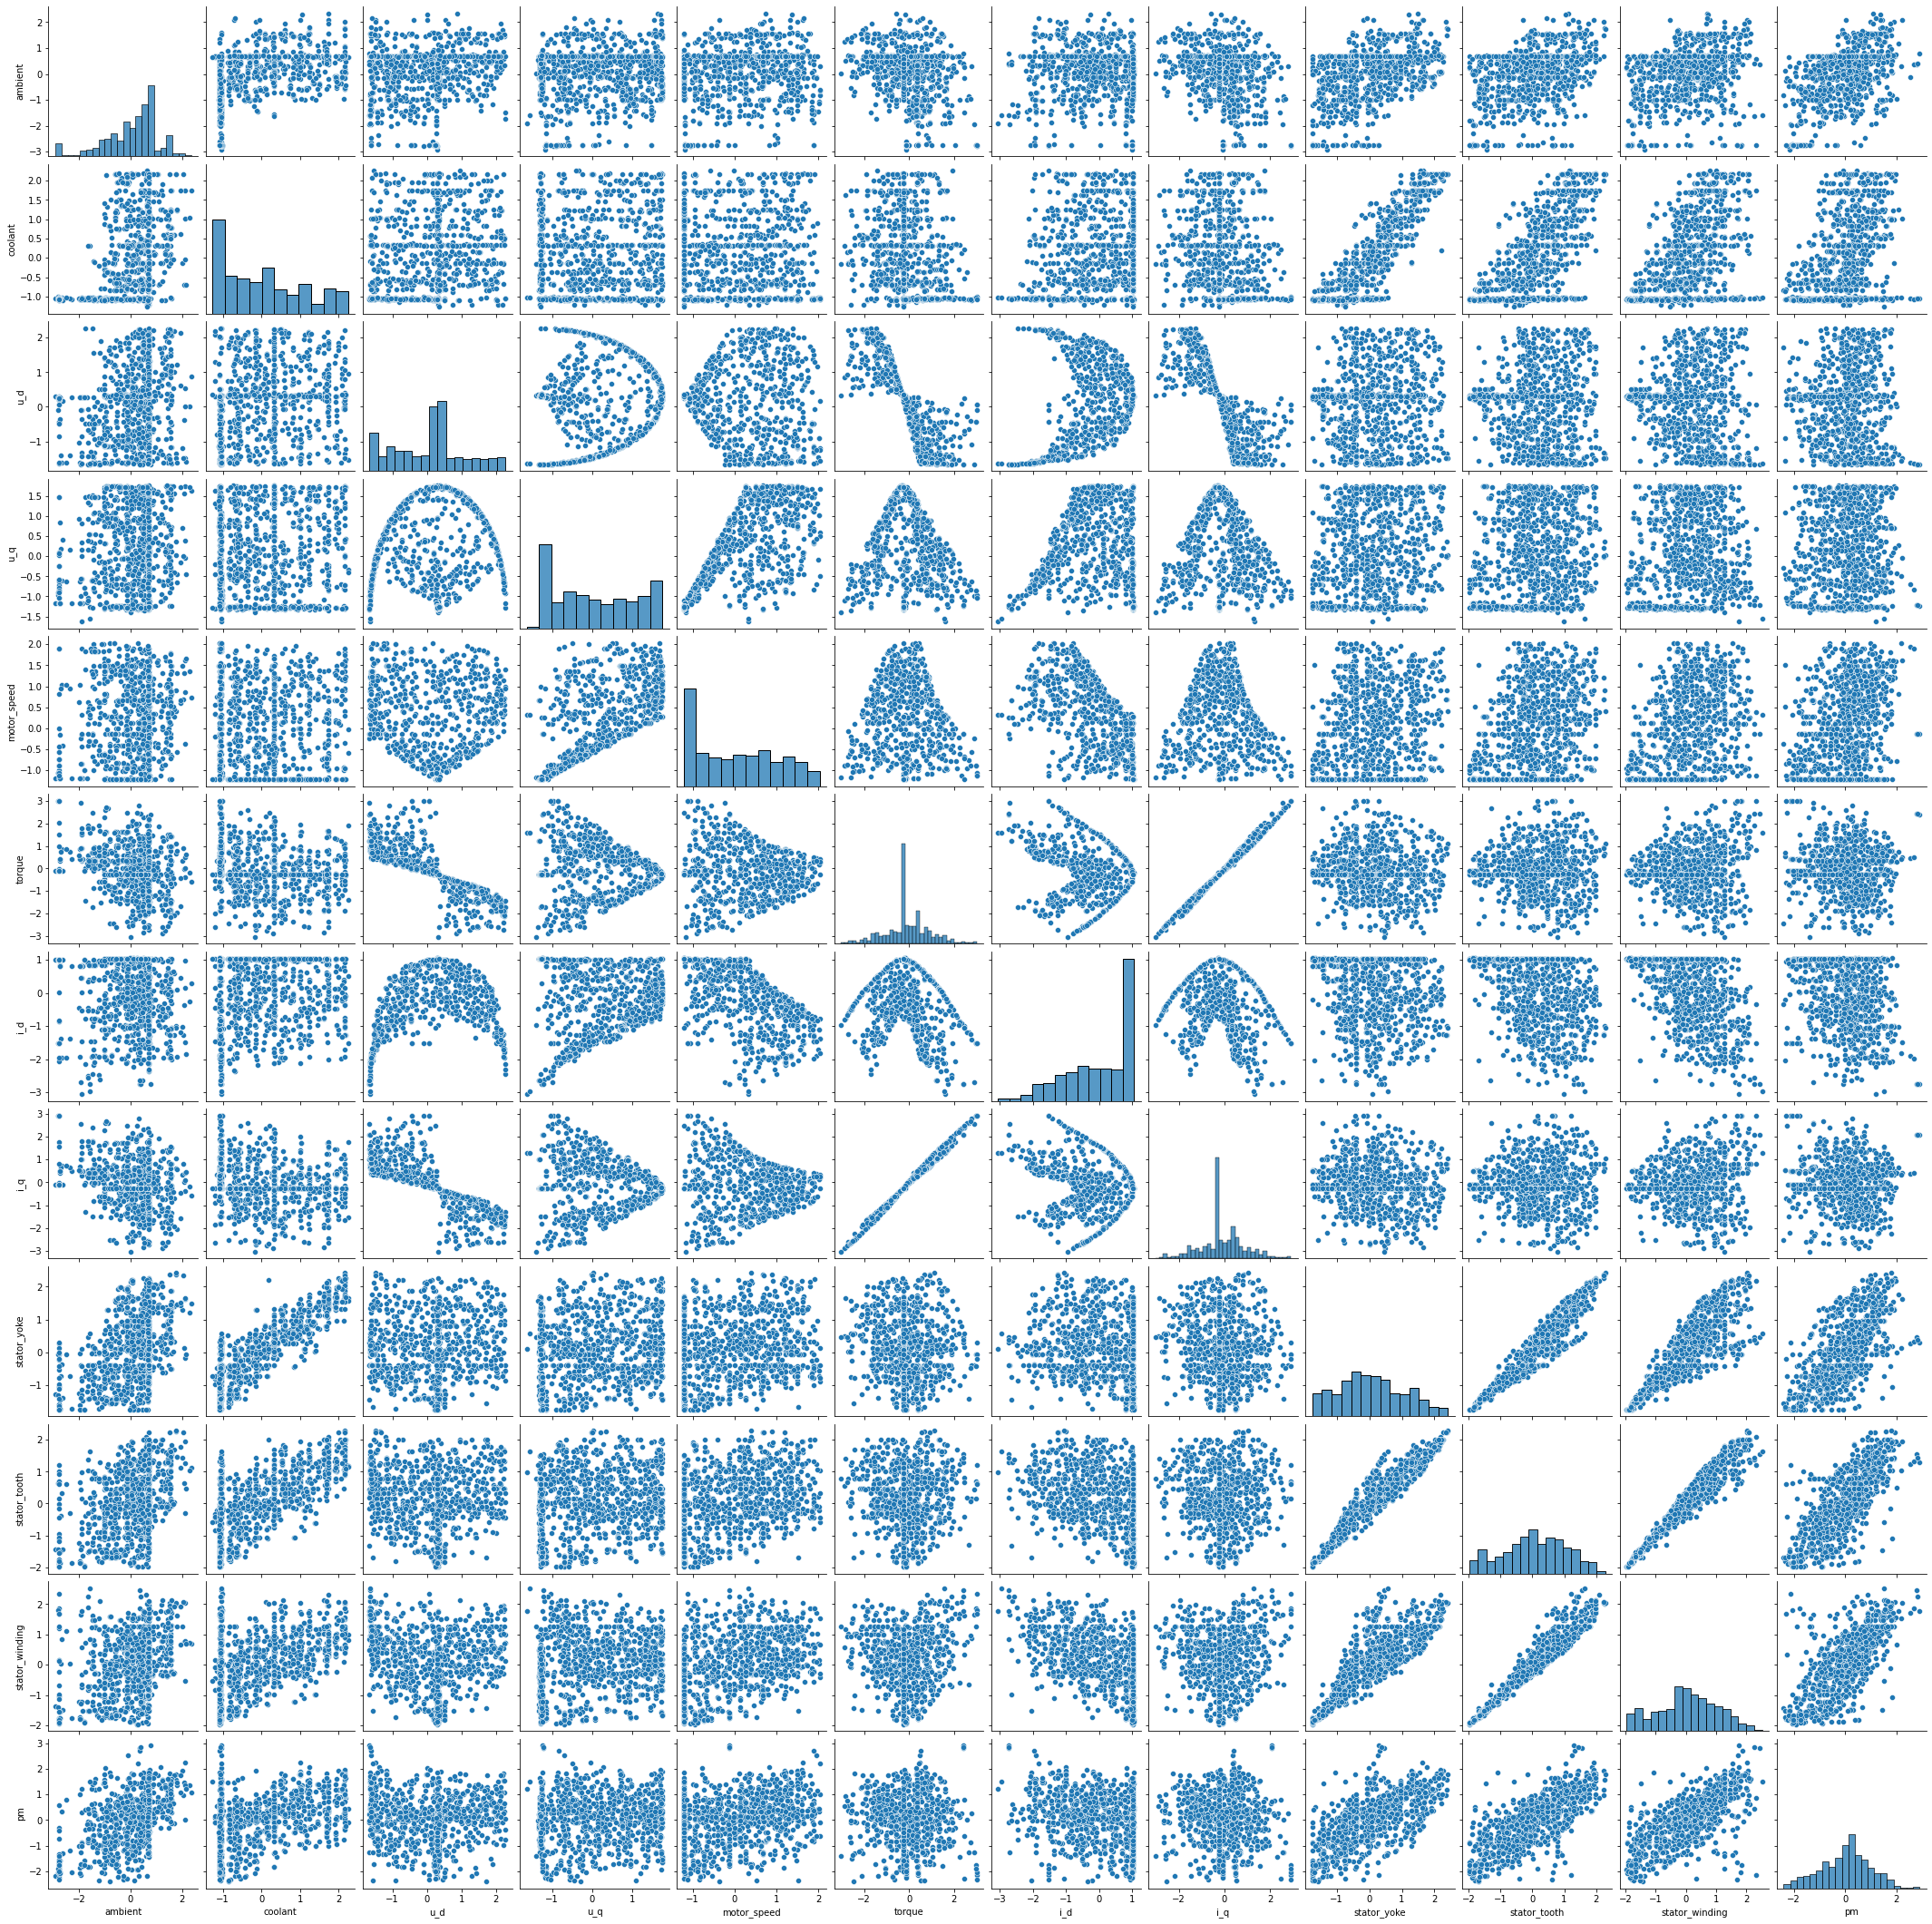

In [11]:
plt.figure(figsize=(16,16))
sns.pairplot(eda_df.sample(1000))
plt.show()

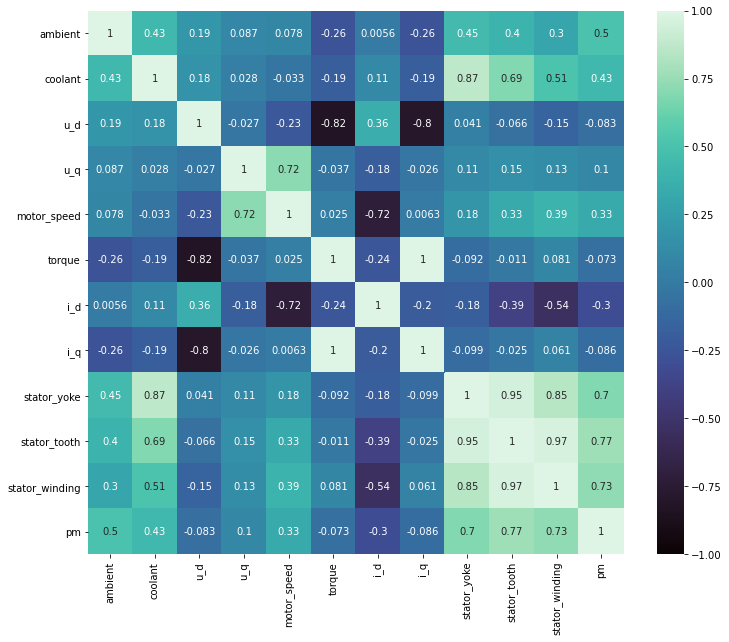

In [12]:
corr=eda_df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,vmin=-1.0,cmap='mako')
plt.show()

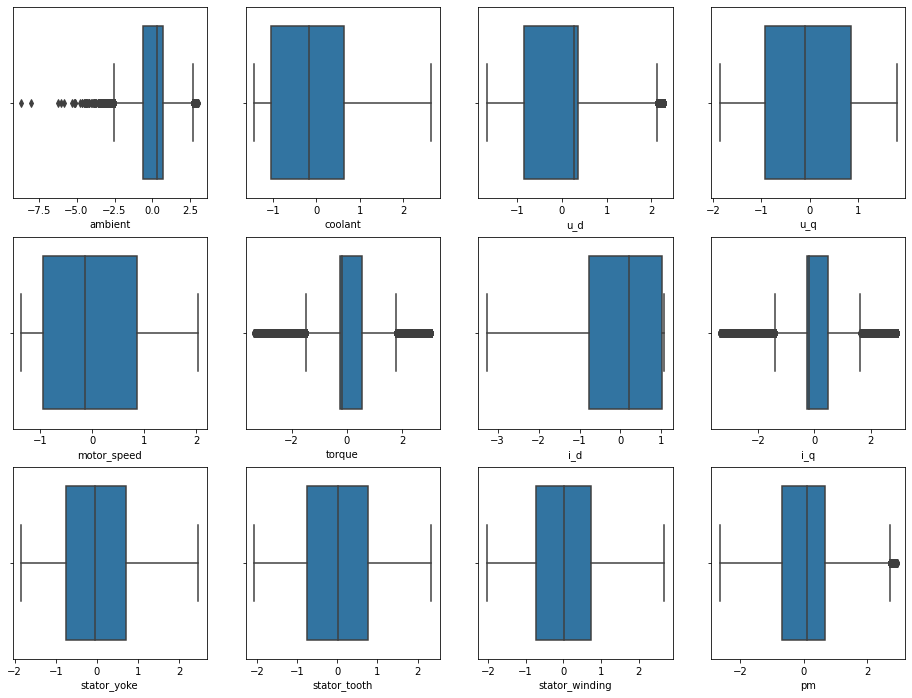

In [13]:
plt.figure(figsize=(16,12))
for i in range(len(eda_df.columns)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(eda_df[eda_df.columns[i]])
plt.show()

 ***DETECTING OUTLIERS FROM BOXPLOT***

In [14]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((eda_df < (Q1 - 1.5 * IQR)) |(eda_df > (Q3 + 1.5 * IQR))).sum()

ambient            38738
coolant                0
i_d                    0
i_q               148799
motor_speed            0
pm                  1501
profile_id             0
stator_tooth           0
stator_winding         0
stator_yoke            0
torque            127712
u_d                18013
u_q                    0
dtype: int64

***REMOVING OUTLIERS***

In [15]:
eda_no_df = eda_df[~((eda_df < (Q1 - 1.5 * IQR)) |(eda_df > (Q3 + 1.5 * IQR))).any(axis=1)]
eda_no_df.shape

(814515, 12)

***BOXPLOT WITHOUT OUTLIERS***

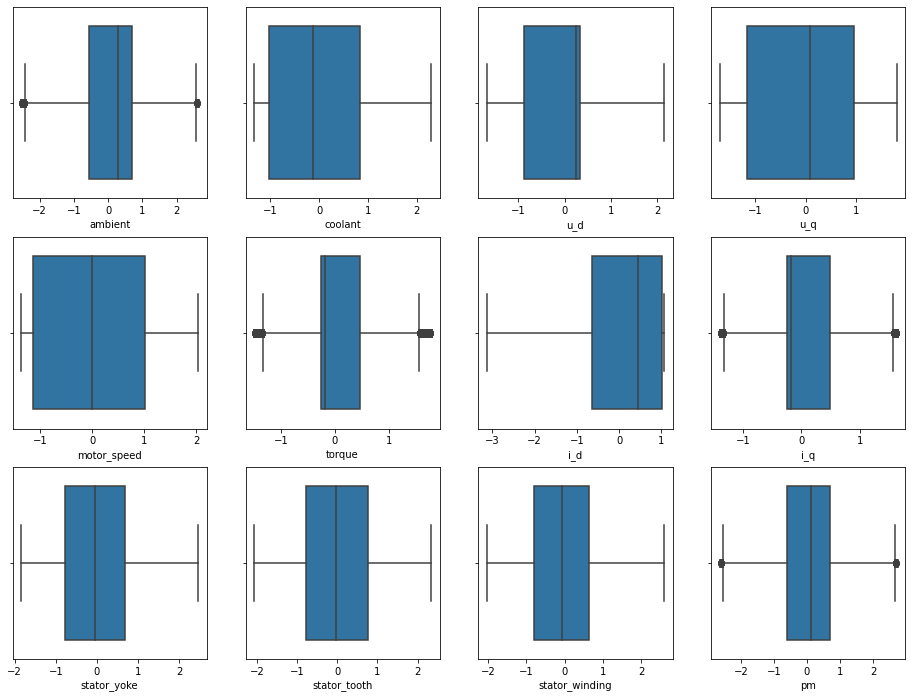

In [16]:
plt.figure(figsize=(16,12))
for i in range(len(eda_no_df.columns)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(eda_no_df[eda_no_df.columns[i]])
plt.show()

***Extract the independent (input) and dependent (output) variable***

In [17]:
# extracting independent variable
X = eda_no_df.iloc[:,:-1].values
# extracting dependent variable
y = eda_no_df.iloc[:,-1].values 
print(X.shape)
print(y.shape)

(814515, 11)
(814515,)


***Splitting the dataset into the Training and Testing sets*** 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(570160, 11) (570160,)
(244355, 11) (244355,)


## Normalization of Dataset 


In [19]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler() 
X_train =mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)
print(X_train, X_test)

[[0.89506297 0.64227742 0.36214347 ... 0.65127811 0.68822498 0.60021113]
 [0.62711672 0.69293691 0.51602534 ... 0.58403804 0.52234871 0.41548813]
 [0.87997803 0.34839031 0.5980422  ... 0.41458611 0.42411063 0.33909707]
 ...
 [0.4588     0.48224485 0.53052263 ... 0.55566596 0.60044738 0.53168702]
 [0.11933462 0.06772744 0.40277193 ... 0.22540046 0.29243908 0.24842003]
 [0.57099314 0.06057573 0.52387699 ... 0.02063424 0.03509709 0.0299367 ]] [[0.58022451 0.21743142 0.66282276 ... 0.32059513 0.40131567 0.36588426]
 [0.62703636 0.22035513 0.24032918 ... 0.36896634 0.45537257 0.44407936]
 [0.79472489 0.53448302 0.64981952 ... 0.51390733 0.49926567 0.4013665 ]
 ...
 [0.61562298 0.92525619 0.39238583 ... 0.8838783  0.83935718 0.70807086]
 [0.30144163 0.0667911  0.44349002 ... 0.14245878 0.19468919 0.18436192]
 [0.55110187 0.33199305 0.52153582 ... 0.41134777 0.44498934 0.40682911]]


In [20]:
print(y_train, y_test)

[ 1.3439696  0.8040305  0.4576887 ...  0.9762911  0.5141576 -0.5856633] [-0.17930196 -0.14296204 -0.0342699  ...  1.1628606  -0.95592207
 -0.16014645]


***Training dataset with Regression Models***

This 4 regression models we are using to predict the PM temperature:
1. Linear Regression Model
2. K-Nearest Neighbour Regressor 
3. XGBoost Regressor
4. AdaBoost Regressor


***Importing Libraries***

In [21]:
pip install xgboost-deploy

Note: you may need to restart the kernel to use updated packages.


In [22]:
import sklearn
import numpy as np
import pandas as pd
from math import sqrt
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

***Linear Regression Model***

In [23]:
l_reg = LinearRegression()
l_reg.fit(X_train,y_train)

l_train_acc = (l_reg.score(X_train,y_train))*100
l_test_acc = (l_reg.score(X_test,y_test))*100

print(f"Train accuracy: {l_train_acc}")
# printf("Train accuracy is %f", l_train_acc)
print(f"Test accuracy: {l_test_acc}")

Train accuracy: 75.4119372652837
Test accuracy: 75.44597661094761


In [24]:
y_pred = l_reg.predict(X_test)
print(y_test.shape, y_pred.shape)

(244355,) (244355,)


In [25]:
r2_l = r2_score(y_test, y_pred)*100
rms_l = sqrt(mean_squared_error(y_test, y_pred))
mae_l = mean_absolute_error(y_test, y_pred)
print(f"R^2 score of model is {r2_l} %")
print(f"Root mean squared error is {rms_l}")
print(f"Mean absolute error is {mae_l}")

R^2 score of model is 75.44597661094761 %
Root mean squared error is 0.47415424587877036
Mean absolute error is 0.3641197316050877


### Performing KFold Cross-Validation (CV) 

In [26]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)
# evaluate model
scores = cross_val_score(l_reg, X_train, y_train, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
y_pred_cv_l = l_reg.predict(X_test)
r2_l_cv = sklearn.metrics.r2_score(y_test, y_pred_cv_l)*100
print(f'R^2 Score: {r2_l_cv} %')

Score Array list: [0.75457074 0.75393345 0.75674483 0.74949701 0.75512754 0.75624277
 0.75363391 0.75291903 0.75629691 0.75195616]


R^2 Score: 75.44597661094761 %


***Evaluation Table***

In [27]:
calculation = pd.DataFrame(np.c_[y_test,l_reg.predict(X_test)], columns = ["Original Temperature","Predicted Temperature"])
calculation.head(5)

,Original Temperature,Predicted Temperature
0,-0.179302,0.102630
1,-0.142962,0.089346
2,-0.034270,0.369813
3,0.418666,-0.020215
4,-0.403945,-0.463689


***Visualizing the test results***

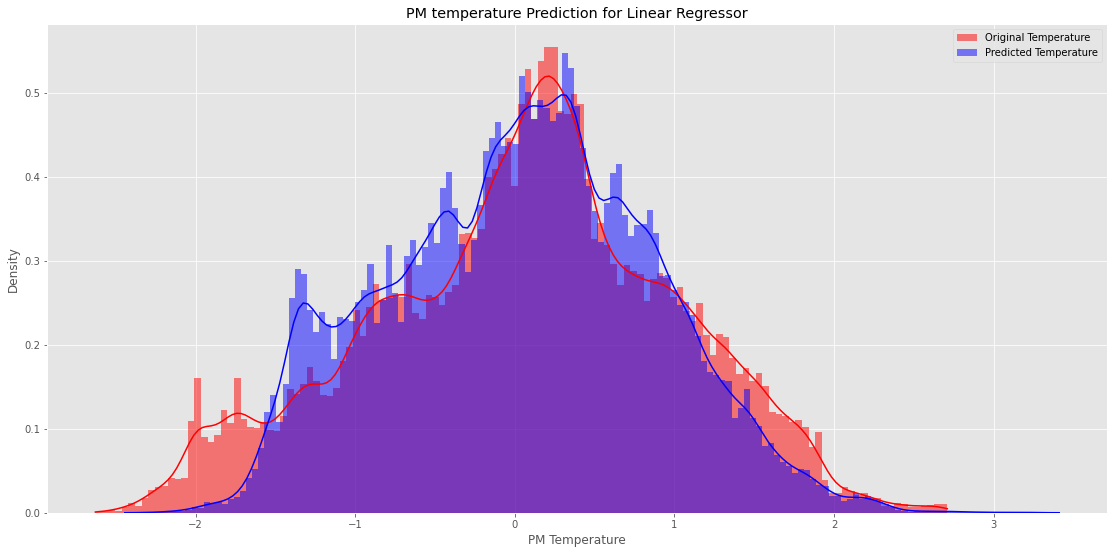

In [28]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(y_pred, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for Linear Regressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

## K-Nearest Neighbour Regressor 

In [29]:
k_reg = KNeighborsRegressor(n_neighbors=10,p=2,metric='minkowski')
k_reg.fit(X_train,y_train)

k_train_acc = (k_reg.score(X_train,y_train))*100
k_test_acc = (k_reg.score(X_test,y_test))*100

print(f"Train accuracy: {k_train_acc}")
print(f"Test accuracy: {k_test_acc}")

Train accuracy: 98.89897340760088
Test accuracy: 98.51134009830557


In [30]:
y_pred = k_reg.predict(X_test)
print(y_test.shape, y_pred.shape)

(244355,) (244355,)


In [31]:
r2_k = r2_score(y_test, y_pred)*100
rms_k = sqrt(mean_squared_error(y_test, y_pred))
mae_k = mean_absolute_error(y_test, y_pred)
print(f"R^2 score of model is {r2_k} %")
print(f"Root mean squared error is {rms_k}")
print(f"Mean absolute error is {mae_k}")

R^2 score of model is 98.51134009830557 %
Root mean squared error is 0.116749776133453
Mean absolute error is 0.04511313370181324


### Performing KFold Cross-Validation (CV) 

In [32]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
k_reg = KNeighborsRegressor()
k_reg.fit(X_train, y_train)
# evaluate model
scores = cross_val_score(k_reg, X_train,y_train, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
y_pred_cv_k = k_reg.predict(X_test)
r2_k_cv = sklearn.metrics.r2_score(y_test, y_pred_cv_k)*100
print(f'R^2 Score: {r2_k_cv} %')

Score Array list: [0.98997016 0.9893388  0.99016371 0.98988087 0.9896622  0.98938646
 0.98990766 0.9895215  0.9900281  0.98996773]


R^2 Score: 99.02701234767719 %


### Evaluation and Visualization

In [33]:
calculation = pd.DataFrame(np.c_[y_test,k_reg.predict(X_test)], columns = ["Original Temperature","Predicted Temperature"])
calculation.head(5)

,Original Temperature,Predicted Temperature
0,-0.179302,-0.169536
1,-0.142962,-0.040205
2,-0.034270,-0.033862
3,0.418666,0.383543
4,-0.403945,-0.415230


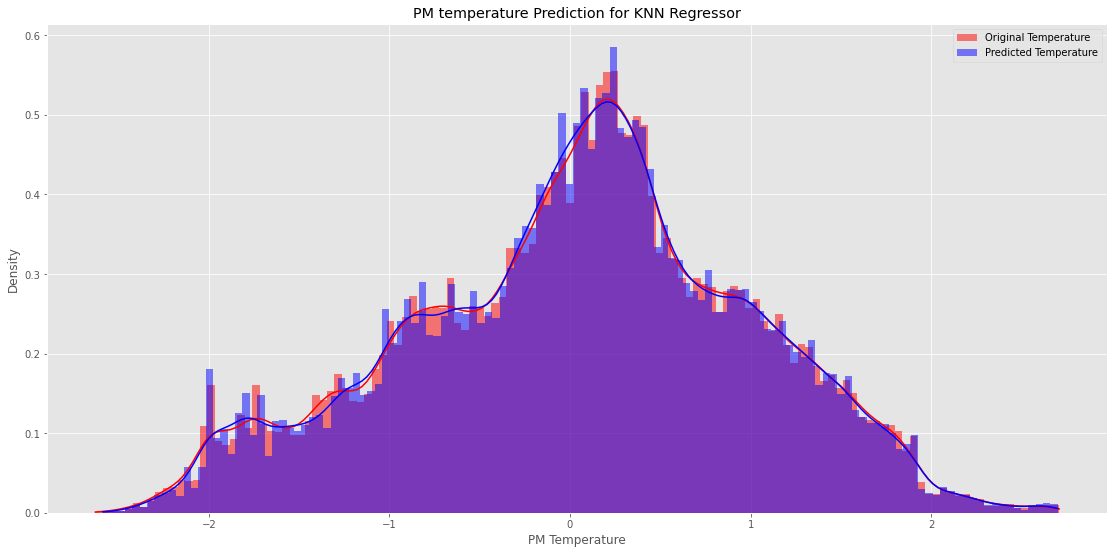

In [34]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(y_pred, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for KNN Regressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

***XGBoost Regressor***

In [35]:
x_reg = XGBRegressor()
x_reg.fit(X_train,y_train)

x_train_acc = (x_reg.score(X_train,y_train))*100
x_test_acc = (x_reg.score(X_test,y_test))*100

print(f"Train accuracy: {x_train_acc}")
print(f"Test accuracy: {x_test_acc}")

Train accuracy: 97.13913876868192
Test accuracy: 93.29737354414527


In [36]:
y_pred = x_reg.predict(X_test)
print(y_test.shape, y_pred.shape)

(244355,) (244355,)


In [37]:
r2_x = r2_score(y_test, y_pred)*100
rms_x = sqrt(mean_squared_error(y_test, y_pred))
mae_x = mean_absolute_error(y_test, y_pred)
print(f"R^2 score of model is {r2_x} %")
print(f"Root mean squared error is {rms_x}")
print(f"Mean absolute error is {mae_x}")

R^2 score of model is 93.29737354414527 %
Root mean squared error is 0.24773126451512925
Mean absolute error is 0.17502323098084102


***Performing KFold Cross-Validation (CV)***

In [38]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
x_reg = XGBRegressor()
x_reg.fit(X_train, y_train)
# evaluate model
scores = cross_val_score(x_reg, X_train, y_train, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
y_pred_cv_x = x_reg.predict(X_test)
r2_x_cv = sklearn.metrics.r2_score(y_test, y_pred_cv_x)*100
print(f'R^2 Score: {r2_x_cv} %')

Score Array list: [0.97043322 0.97106641 0.97072214 0.97113715 0.96989759 0.97133042
 0.9705218  0.96957231 0.97127027 0.96960565]


R^2 Score: 93.29737354414527 %


***Evaluation and Visualization***

In [39]:
calculation = pd.DataFrame(np.c_[y_test,x_reg.predict(X_test)], columns = ["Original Temperature","Predicted Temperature"])
calculation.head(5)

,Original Temperature,Predicted Temperature
0,-0.179302,-0.352233
1,-0.142962,0.046024
2,-0.034270,0.004566
3,0.418666,0.390800
4,-0.403945,-0.789363


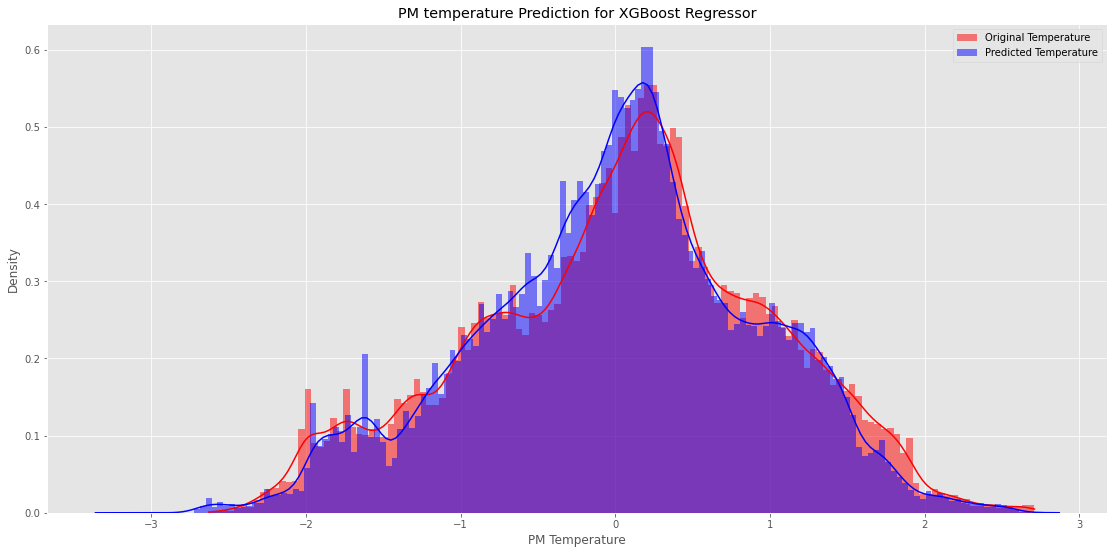

In [40]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(y_pred, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for XGBoost Regressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

***AdaBoost Regressor***

In [41]:
dtree = DecisionTreeRegressor()
a_reg = AdaBoostRegressor(n_estimators=100, base_estimator=dtree,learning_rate=1)
a_reg.fit(X_train, y_train)

a_train_acc = (a_reg.score(X_train,y_train))*100
a_test_acc = (a_reg.score(X_test,y_test))*100

print(f"Train accuracy: {a_train_acc}")
print(f"Test accuracy: {a_test_acc}")

Train accuracy: 99.99997724830713
Test accuracy: 97.80894352652288


In [42]:
y_pred = a_reg.predict(X_test)
print(y_test.shape, y_pred.shape)

(244355,) (244355,)


In [43]:
r2_a = r2_score(y_test, y_pred)*100
rms_a = sqrt(mean_squared_error(y_test, y_pred))
mae_a = mean_absolute_error(y_test, y_pred)
print(f"R^2 score of model is {r2_a} %")
print(f"Root mean squared error is {rms_a}")
print(f"Mean absolute error is {mae_a}")

R^2 score of model is 97.80894352652288 %
Root mean squared error is 0.14163973220846376
Mean absolute error is 0.03749383855138352


***Performing KFold Cross-Validation (CV)***

In [44]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
a_reg = AdaBoostRegressor()
a_reg.fit(X_train, y_train)
# evaluate model
scores = cross_val_score(a_reg, X_train, y_train, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
y_pred_cv_a = a_reg.predict(X_test)
r2_a_cv = sklearn.metrics.r2_score(y_test, y_pred_cv_a)*100
print(f'R^2 Score: {r2_a_cv} %')

Score Array list: [0.70225145 0.70840773 0.7041104  0.70039279 0.70477418 0.70303308
 0.70454972 0.70454404 0.71331915 0.71145711]


R^2 Score: 69.85630588719738 %


***Evaluation and Visualization***

In [45]:
calculation = pd.DataFrame(np.c_[y_test,a_reg.predict(X_test)], columns = ["Original Temperature","Predicted Temperature"])
calculation.head(5)

,Original Temperature,Predicted Temperature
0,-0.179302,-0.458003
1,-0.142962,0.024925
2,-0.034270,0.091333
3,0.418666,-0.322863
4,-0.403945,-0.497979


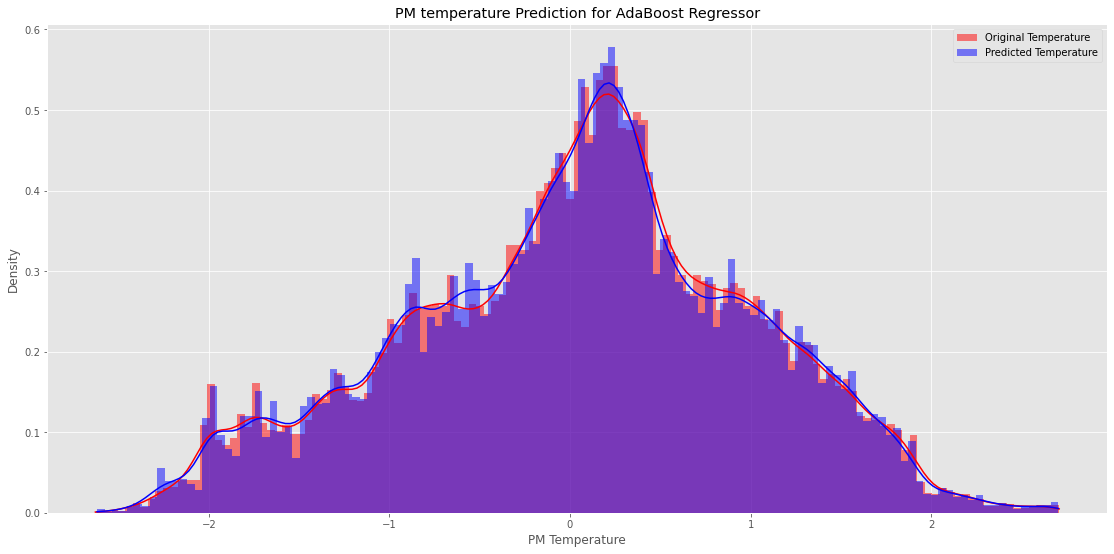

In [46]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(y_pred, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for AdaBoost Regressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

## Evaluation Table 

In [47]:
models = pd.DataFrame({
    'Algorithm': ['Linear Regression','XGBoost Regressor', 
             'AdaBoost Regressor',  'K-Nearest Neighbours Regressor'],
    'Training Accuracy' : [l_train_acc, x_train_acc, a_train_acc, k_train_acc],
    'Testing Auracy' : [l_test_acc, x_test_acc, a_test_acc, k_test_acc],
    'RMS Score' : [rms_l, rms_x, rms_a, rms_k],
    'MAE Score' : [mae_l, mae_x, mae_a, mae_k],
    'R^2 Score': [ r2_l, r2_x, r2_a, r2_k],
    'CV R^2 Score': [r2_l_cv, r2_x_cv, r2_a_cv, r2_k_cv]
})

models.sort_values(by = ['Training Accuracy', 'Testing Auracy', 'RMS Score', 'MAE Score', 'R^2 Score','CV R^2 Score'], 
                   ascending = True)

,Algorithm,Training Accuracy,Testing Auracy,RMS Score,MAE Score,R^2 Score,CV R^2 Score
0,Linear Regression,75.411937,75.445977,0.474154,0.364120,75.445977,75.445977
1,XGBoost Regressor,97.139139,93.297374,0.247731,0.175023,93.297374,93.297374
3,K-Nearest Neighbours Regressor,98.898973,98.511340,0.116750,0.045113,98.511340,99.027012
2,AdaBoost Regressor,99.999977,97.808944,0.141640,0.037494,97.808944,69.856306


***Comaprison Graphs***

***Algorithm vs. R^2 Score***

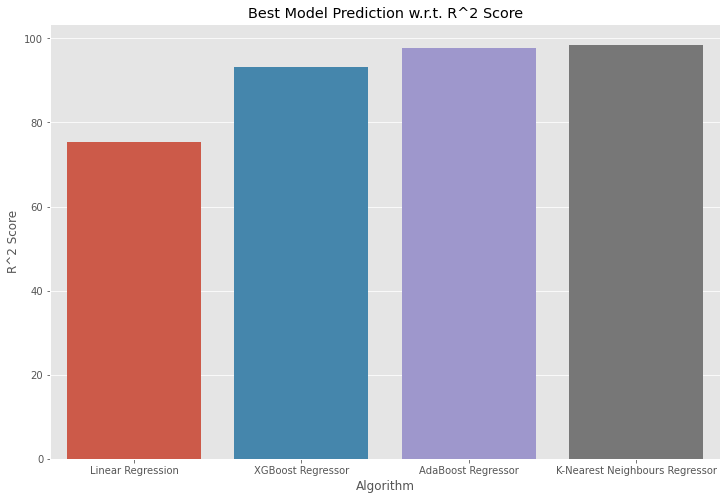

In [48]:
plt.style.use('ggplot') 
plt.figure(figsize=(12,8))
sns.barplot(x='Algorithm',y='R^2 Score',data=models)
plt.title("Best Model Prediction w.r.t. R^2 Score") 
plt.show()

***Algorithm vs. CV R^2 Score***

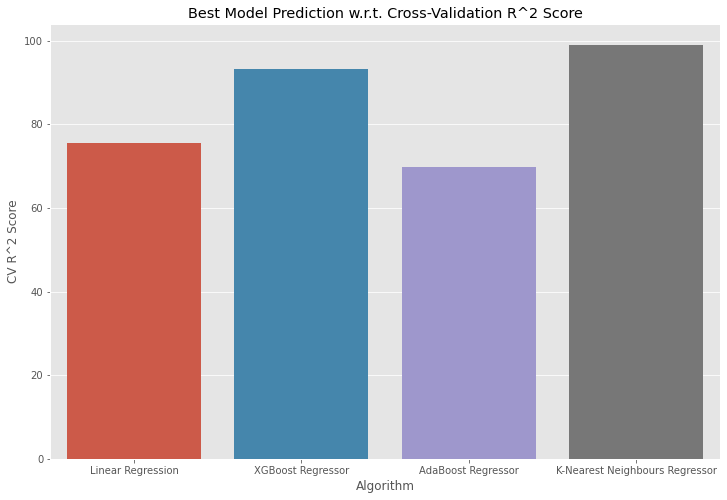

In [49]:
plt.style.use('ggplot') 
plt.figure(figsize=(12,8))
sns.barplot(x='Algorithm',y='CV R^2 Score',data=models)
plt.title("Best Model Prediction w.r.t. Cross-Validation R^2 Score") 
plt.show()

***Algorithm vs. Training Accuracy***

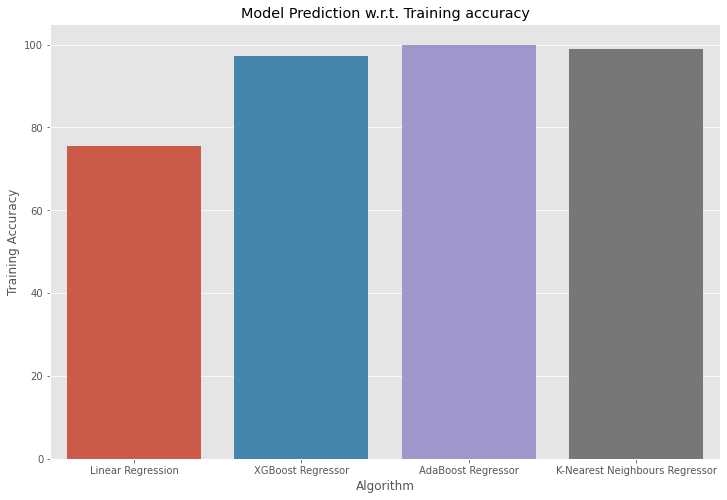

In [50]:
plt.style.use('ggplot') 
plt.figure(figsize=(12,8))
sns.barplot(x='Algorithm',y='Training Accuracy',data=models)
plt.title("Model Prediction w.r.t. Training accuracy")
plt.show()

***Algorithm vs. Testing Accuracy***

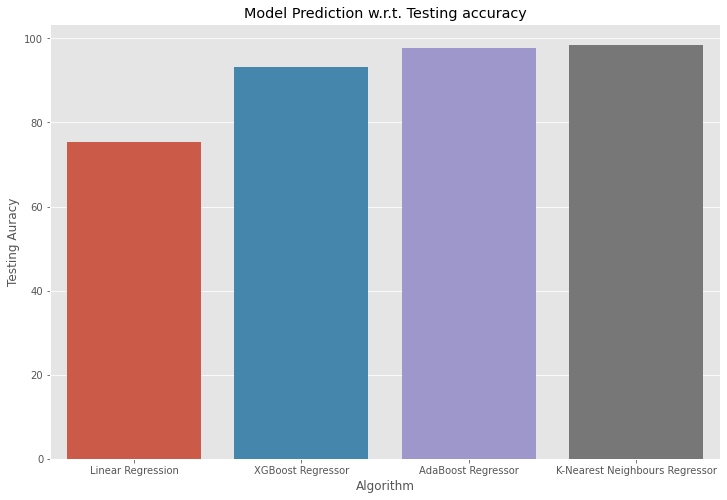

In [51]:
plt.style.use('ggplot') 
plt.figure(figsize=(12,8))
sns.barplot(x='Algorithm',y='Testing Auracy',data=models)
plt.title("Model Prediction w.r.t. Testing accuracy")
plt.show()

***Saving the KNN Train Model***

In [52]:
import pickle

In [53]:
filename='trained_model.sav'
pickle.dump(k_reg, open(filename,'wb'))

***loding the saved KNN Train model***

In [54]:
loaded_model=pickle.load(open('trained_model.sav', 'rb'))